# Results

1. The Nintendo DS and Playstation 2 have the greatest number of video game releases. All other consoles have far fewer releases.<br>
2. The Playstation 2 holds the highest global sales of all platforms. The Xbox 360, Playstation 3, Nintendo Wii, Nintendo DS, and the original Playstation also have relatively high sales, with no other consoles reaching even half the sales of the original Playstation.<br>
3. The number of video game releases rose dramatically after 1994, until hitting a peak around 2008 and 2009 and quickly decreasing in later years.<br>
4. Video game sales matched the same patterns as releases. Sales were relatively steady until 1994, when it started to rise until 2008, when sales began to quickly decrease.<br>
5. Action games have the most releases, followed by sports games. Puzzle games have the fewest releases, with strategy games faring slightly better.<br>
6. The overall of games according to genre follows mostly the same pattern as number of releases by genre. Action and sports games make the most overall sales.<br>
7. Action, sports, and shooting games account for the most sales in both North America and Europe. Role-playing games, however, make by far the most sales in Japan with no other genre being able to obtain half the sales.<br>
8. Electronic Arts publishes more games than any other publisher. Activision, which is second in release count, achieves only two-thirds of Electronic Arts' release count.<br>
9. Nintendo games have the highest overall sales. Electronic Arts comes 2nd in sales, but is far behind. Other publishers are even further away from Nintendo's sales.<br>
10. North America is responsible for about half of the world's sales in video games. Europe's sales account for about a quarter, and Japan's sales account for about an eighth.

# Columns

<strong>Rank</strong>: The game's ranking based on global sales.<br>
<strong>Name</strong>: The title of the game.<br>
<strong>Platform</strong>: The platform that the game was released on.<br>
<strong>Year</strong>: The release year of the game.<br>
<strong>Publisher</strong>: The name of the publisher company.<br>
<strong>NA_Sales</strong>: The game's total sales in North America in millions of dollars.<br>
<strong>EU_Sales</strong>: The game's total sales in Europe in millions of dollars.<br>
<strong>JP_Sales</strong>: The game's total sales in Japan in millions of dollars.<br>
<strong>Other_Sales</strong>: The game's total sales in other regions in millions of dollars.<br>
<strong>Global_Sales</strong>: The game's total worldwide sales in millions of dollars.<br>

# 1. Importing Libraries and Data

In [1]:
# numpy and pandas are needed for manipulating data, while matplotlib and seaborn will be used
# for visualizing the data after it has been cleaned and preprocessed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We will be working with a copy of the raw data to avoid tampering with the original
# dataset.
rawData = pd.read_csv("vgsales.csv")
df = rawData.copy()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 2. Cleaning and Preprocessing

#### We'll start by finding missing values in the data.

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### The only columns with missing data are the Year and Publisher columns.

In [5]:
# Get the number of rows containing missing data.
badRowIndices = []
for i in range(len(df.index)):
    if df.iloc[i].isnull().sum() > 0:
        badRowIndices.append(i)
len(badRowIndices)

307

#### Out of 16598 rows, 307 of them have missing data. Relatively speaking, this is not a lot, so we can safely drop these rows.

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Just for convention, we'll convert the Year data to integers.

In [8]:
df = df.astype({'Year': 'int64'})
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### With no more missing values and no values that seem otherwise erroenous, we're done with cleaning the data, but we'll have to do a bit of preprocessing for each of the sections after this one in order to isolate the data we want to visualize for that section.

# 3. Which Platforms Saw The Most Game Releases?

In [9]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
# We'll create a dataframe containing the number of games released by platform.
# The code below groups the data by the Platform column, counting the releases by using the 
# Name column, and sorts the values in descending order. The reset_index method returns a 
# dataframe with default integer IDs.
dfPlatformCount = df.groupby(by=['Platform'])['Name'].count().sort_values(ascending = False).reset_index()
dfPlatformCount

,Platform,Name
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234
5,PSP,1197
6,PS,1189
7,PC,938
8,XB,803
9,GBA,786


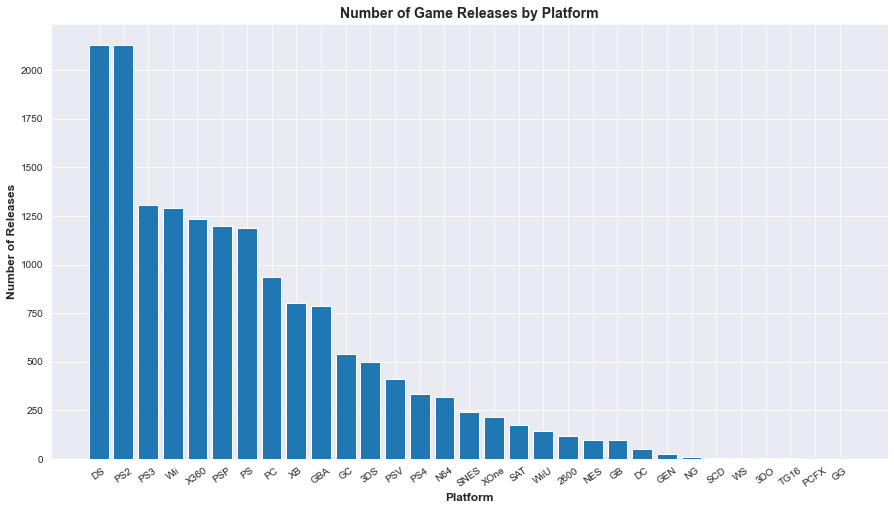

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfPlatformCount['Platform'], height = dfPlatformCount["Name"])
plt.title("Number of Game Releases by Platform", fontsize = 14, fontweight = "bold")
plt.xlabel("Platform", fontsize = 12, fontweight = "bold")
plt.ylabel("Number of Releases", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

#### From this graph, we can see that the Nintendo DS and the PS2 are the consoles with by far, the most game releases. Despite the PC being able to outlast several other consoles, it is ranked 8th among them. However, each entry in the dataset lists only one console per game, so the data does not account for the fact that many games are released on multiple consoles.

# 4. Which Platforms Have The Highest Overall Sales?

In [12]:
# We'll create a new dataframe containing the global sales of games by their platform.
dfPlatformSales = df.groupby(by=["Platform"])["Global_Sales"].sum().sort_values(ascending=False).reset_index()
dfPlatformSales

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


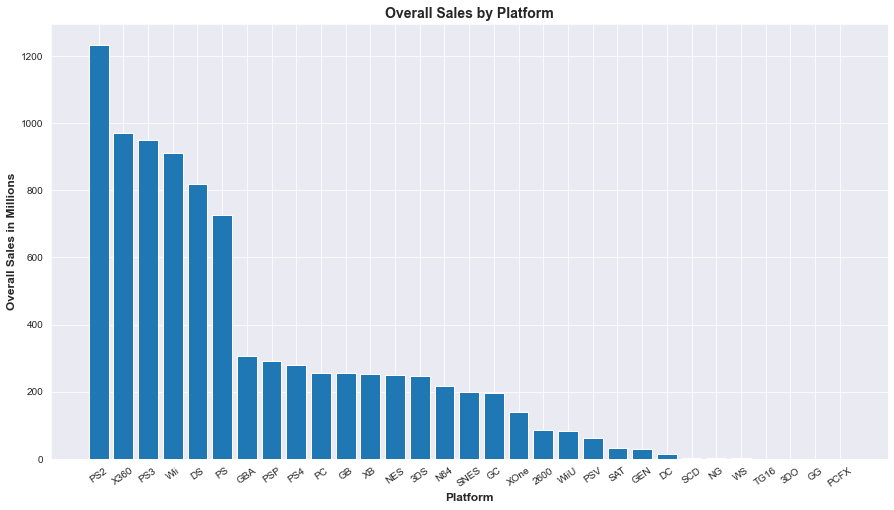

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfPlatformSales["Platform"], height = dfPlatformSales["Global_Sales"])
plt.title("Overall Sales by Platform", fontsize = 14, fontweight = "bold")
plt.xlabel("Platform", fontsize = 12, fontweight = "bold")
plt.ylabel("Overall Sales in Millions", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

#### PS2 games have the highest sales, with the Xbox 360 falling at second by a considerable amount. Despite the Nintendo DS having about the same number of released games as the PS2, it appears to have only two-thirds of the sales as the PS2. There is also a large cutoff between Playstation and Gameboy Advance sales.

# 5. Which Year Had The Most Game Releases?

In [23]:
# We'll create a dataframe containing the number of games released by year.
dfYearCount = df.groupby(by=['Year'])['Name'].count().sort_values(ascending = False).reset_index().sort_values(by = ["Year"])
dfYearCount

,Year,Name
36,1980,9
24,1981,46
27,1982,36
30,1983,17
35,1984,14
34,1985,14
28,1986,21
31,1987,16
33,1988,15
29,1989,17


#### Almost all of the data corresponds to games released between 1980-2016. Besides that, there are 3 records of games from 2017 and 1 from 2020. These two years will cause an unecessary dip in the data visualization, so I will remove them from this dataframe.

In [24]:
dfYearCount = dfYearCount.drop([37, 38])
dfYearCount

,Year,Name
36,1980,9
24,1981,46
27,1982,36
30,1983,17
35,1984,14
34,1985,14
28,1986,21
31,1987,16
33,1988,15
29,1989,17


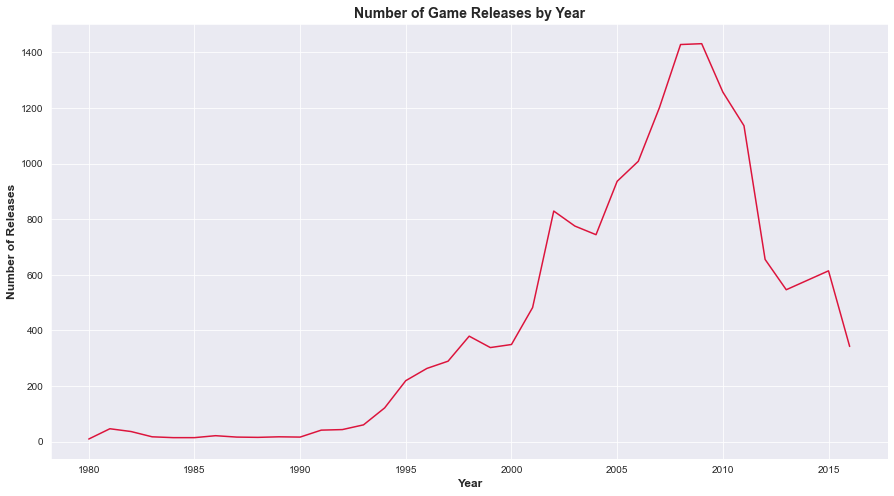

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.plot(dfYearCount["Year"], dfYearCount['Name'], color = "crimson")
plt.title("Number of Game Releases by Year", fontsize = 14, fontweight = "bold")
plt.xlabel("Year", fontsize = 12, fontweight = "bold")
plt.ylabel("Number of Releases", fontsize = 12, fontweight = "bold")
plt.show()

#### The number of game releases seemed to be stagnant from 1980-1993, but began to dramatically rise after 1994, with the highest number of releases at 2008 and 2009, which is suprising to me since the Great Recession occured around that time. After 2011, the number of releases decreased notably faster than they had previously risen.

# 6. Which Year Saw the Highest Overall Sales?

In [26]:
# We'll create a new dataframe containing the global sales of games by their platform.
dfYearSales = df.groupby(by=["Year"])["Global_Sales"].sum().sort_values(ascending=False).reset_index().sort_values(by = ["Year"])
dfYearSales

,Year,Global_Sales
36,1980,11.38
31,1981,35.77
33,1982,28.86
35,1983,16.79
26,1984,50.36
25,1985,53.94
30,1986,37.07
34,1987,21.74
28,1988,47.22
23,1989,73.45


#### As with the previous visualization, we'll remove records from 2017 and 2020 since they are clearly outliers.

In [27]:
dfYearSales = dfYearSales.drop([37,38])
dfYearSales

,Year,Global_Sales
36,1980,11.38
31,1981,35.77
33,1982,28.86
35,1983,16.79
26,1984,50.36
25,1985,53.94
30,1986,37.07
34,1987,21.74
28,1988,47.22
23,1989,73.45


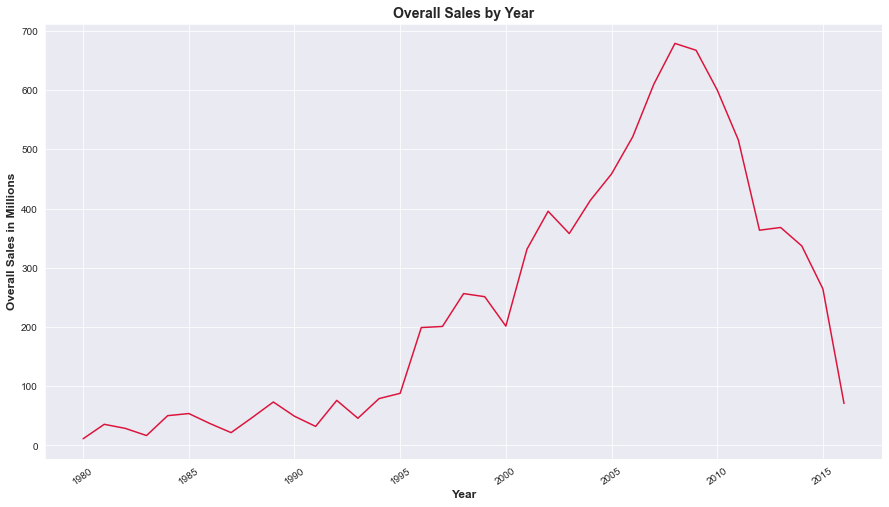

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.plot(dfYearSales["Year"], dfYearSales["Global_Sales"], color = "crimson")
plt.title("Overall Sales by Year", fontsize = 14, fontweight = "bold")
plt.xlabel("Year", fontsize = 12, fontweight = "bold")
plt.ylabel("Overall Sales in Millions", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 35)
plt.show()

#### As expected, the years that released more games also saw more sales. Sales appeared to very gradually increase from 1980 to 1995, sharply increasing until max sales in 2008 and then suddenly dropping afterwards. 

# 7. Which Genres Have More Releases?

In [29]:
# We need a dataframe that groups all the different generes together.
dfGenre = df.groupby(by = ["Genre"])["Name"].count().sort_values(ascending = False).reset_index()
dfGenre

,Genre,Name
0,Action,3251
1,Sports,2304
2,Misc,1686
3,Role-Playing,1470
4,Shooter,1282
5,Adventure,1274
6,Racing,1225
7,Platform,875
8,Simulation,848
9,Fighting,836


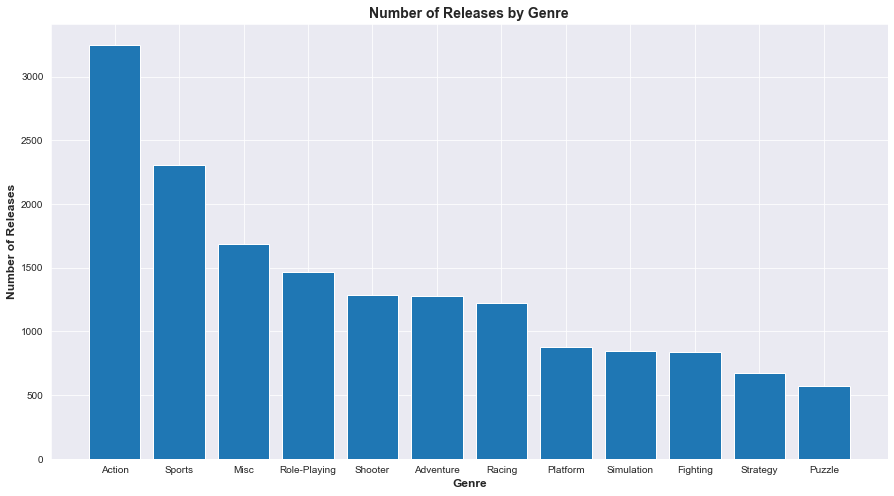

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfGenre["Genre"], height = dfGenre["Name"])
plt.title("Number of Releases by Genre", fontsize = 14, fontweight = "bold")
plt.xlabel("Genre", fontsize = 12, fontweight = "bold")
plt.ylabel("Number of Releases", fontsize = 12, fontweight = "bold")
plt.show()

#### Action games are definitively the most common, followed not closely by sports and miscllaneous games. Puzzle and strategy games have the least releases. This tells us that people seem to prefer more action-oriented games over puzzle and strategy games, which are typically slower in pace.

# 8. Which Genres Made The Most Overall Sales?

In [33]:
# Make a dataframe that group the overall sales of games by their genre.
dfGenreSales = df.groupby(by=["Genre"])["Global_Sales"].sum().sort_values(ascending=False).reset_index()
dfGenreSales

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


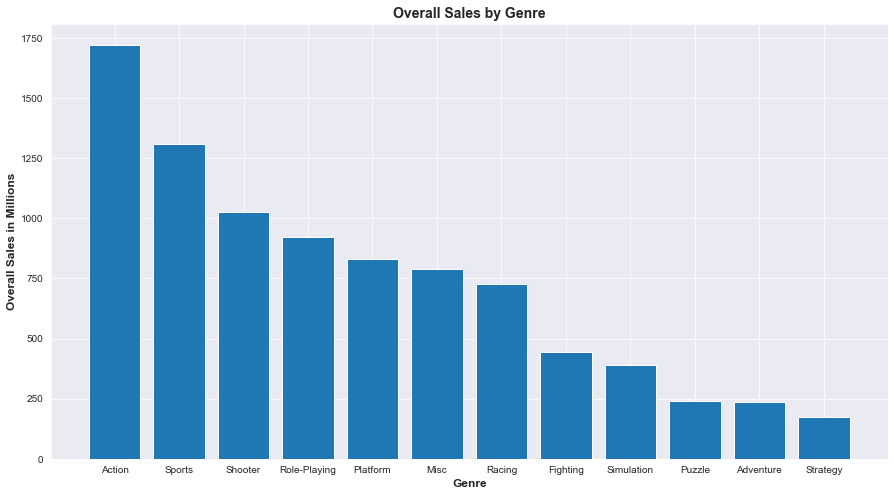

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfGenreSales["Genre"], height = dfGenreSales["Global_Sales"])
plt.title("Overall Sales by Genre", fontsize = 14, fontweight = "bold")
plt.xlabel("Genre", fontsize = 12, fontweight = "bold")
plt.ylabel("Overall Sales in Millions", fontsize = 12, fontweight = "bold")
plt.show()

#### Action and sports games rank highest in terms of overall sales, which is unsuprising, considering that the two genres also share the most number of releases. Shooter games rank 3rd, despite being 5th in releases, and puzzle games make more money than both adventure and strategy games despite having the smallest number of releases. This further supports the idea that action-oriented games tend to be more popular, as games that are better received perform better in sales; however, it then seems strange that adventure games are second to last in terms of sales.

# 9. Which Genres Sell More In North America, Europe, and Japan?

In [35]:
# Group games by genre and NA sales.
dfGenreSalesNA = df.groupby(by=["Genre"])["NA_Sales"].sum().sort_values(ascending=False).reset_index()
dfGenreSalesNA

,Genre,NA_Sales
0,Action,861.77
1,Sports,670.09
2,Shooter,575.16
3,Platform,445.99
4,Misc,396.92
5,Racing,356.93
6,Role-Playing,326.50
7,Fighting,220.74
8,Simulation,181.78
9,Puzzle,122.01


In [36]:
# Group games by genre and EU sales.
dfGenreSalesEU = df.groupby(by=["Genre"])["EU_Sales"].sum().sort_values(ascending=False).reset_index()
dfGenreSalesEU

,Genre,EU_Sales
0,Action,516.48
1,Sports,371.34
2,Shooter,310.45
3,Racing,236.31
4,Misc,211.77
5,Platform,200.65
6,Role-Playing,187.57
7,Simulation,113.02
8,Fighting,100.00
9,Adventure,63.74


In [37]:
# Group games by genre and JP sales.
dfGenreSalesJP = df.groupby(by=["Genre"])["JP_Sales"].sum().sort_values(ascending=False).reset_index()
dfGenreSalesJP

,Genre,JP_Sales
0,Role-Playing,350.29
1,Action,158.65
2,Sports,134.76
3,Platform,130.65
4,Misc,106.67
5,Fighting,87.15
6,Simulation,63.54
7,Puzzle,56.68
8,Racing,56.61
9,Adventure,51.99


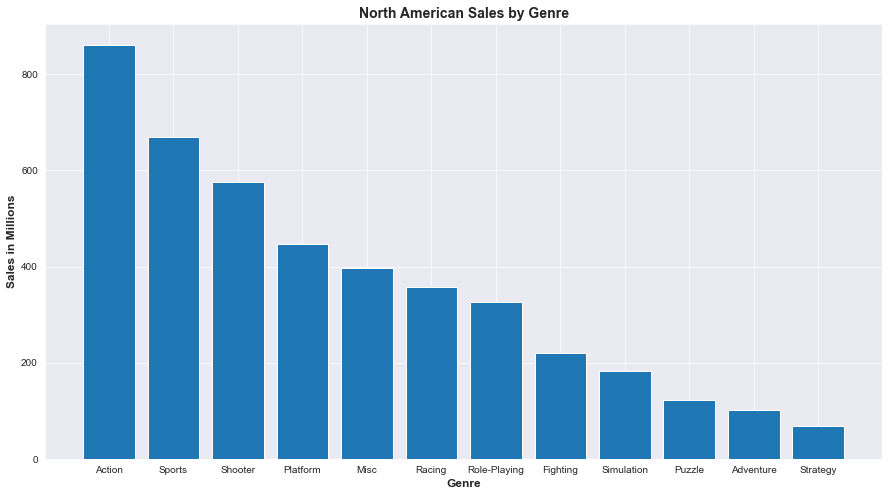

In [40]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfGenreSalesNA["Genre"], height = dfGenreSalesNA["NA_Sales"])
plt.title("North American Sales by Genre", fontsize = 14, fontweight = "bold")
plt.xlabel("Genre", fontsize = 12, fontweight = "bold")
plt.ylabel("Sales in Millions", fontsize = 12, fontweight = "bold")
plt.show()

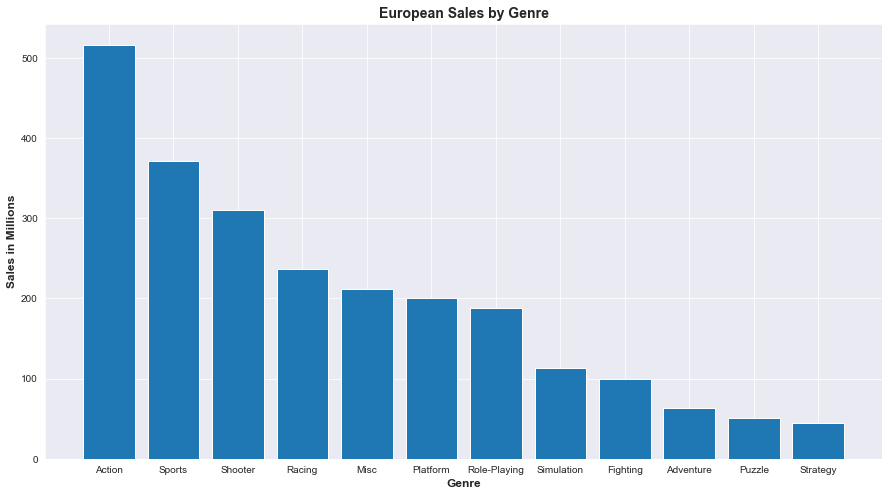

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfGenreSalesEU["Genre"], height = dfGenreSalesEU["EU_Sales"])
plt.title("European Sales by Genre", fontsize = 14, fontweight = "bold")
plt.xlabel("Genre", fontsize = 12, fontweight = "bold")
plt.ylabel("Sales in Millions", fontsize = 12, fontweight = "bold")
plt.show()

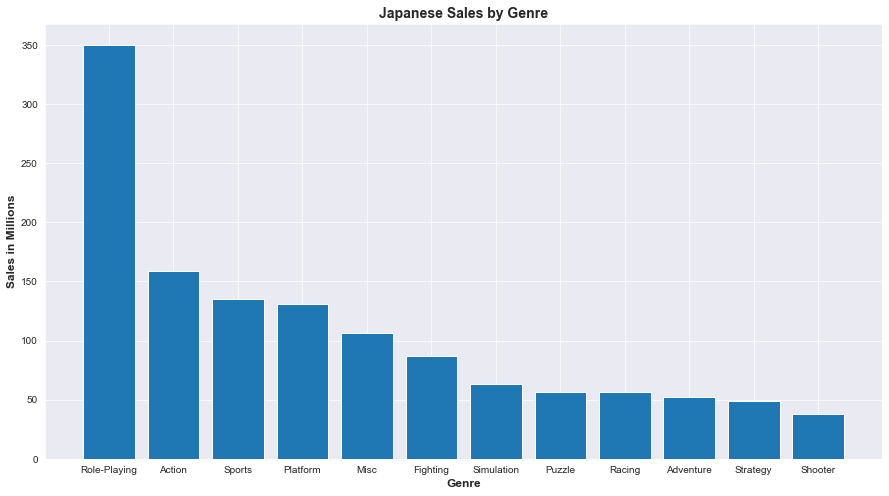

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfGenreSalesJP["Genre"], height = dfGenreSalesJP["JP_Sales"])
plt.title("Japanese Sales by Genre", fontsize = 14, fontweight = "bold")
plt.xlabel("Genre", fontsize = 12, fontweight = "bold")
plt.ylabel("Sales in Millions", fontsize = 12, fontweight = "bold")
plt.show()

#### North American and European sales seem to reflect mostly the same genre preferences as overall sales. Both regions prefer action, sports, and shooter games, while showing less favor to adventure, puzzle, and strategy games. Japanese sales, however, deviate from this pattern. Role-playing games are far and away the most popular genre in Japan, with action games being the second most popular but not even reaching half the sales of role-playing games. Shooter games, despite being the 3rd most selling genre according to North American, European, and overall sales, have the least sales in Japan.

# 10. Which Publishers Released The Most Games?

In [45]:
# Create a dataframe grouping publishers and their game releases.
dfPubCount = df.groupby(by = ["Publisher"])["Name"].count().sort_values(ascending = False).reset_index()
dfPubCount

,Publisher,Name
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
571,Ertain,1
572,Epic Games,1
573,Seventh Chord,1
574,Enjoy Gaming ltd.,1


#### There are are a total of 576 publishers, which is far more than can be properly shown in a single diagram, so we'll only include the 12 publishers with the most releases.

In [49]:
dfPubCount[:12]

,Publisher,Name
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


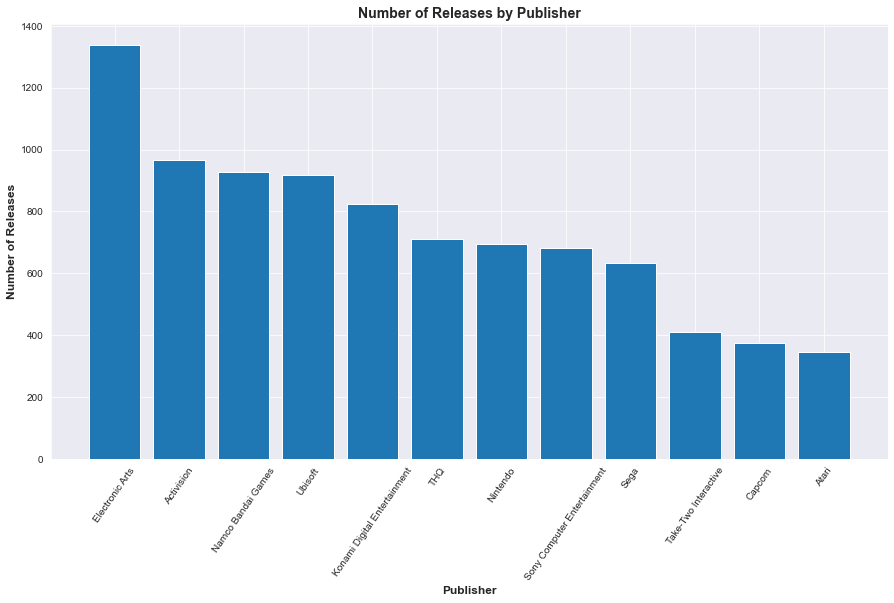

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfPubCount[:12]["Publisher"], height = dfPubCount[:12]["Name"])
plt.title("Number of Releases by Publisher", fontsize = 14, fontweight = "bold")
plt.xlabel("Publisher", fontsize = 12, fontweight = "bold")
plt.ylabel("Number of Releases", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 55)
plt.show()

#### The data shows that Electronic Arts has the leading number of releases, having approximately 30% more than Activision, being the runner-up. There is also a notable difference between Sega and Take-Two Interactive's releases, with Sega having 150% of Take-Two Interactive's release count.

# 11. Which Publishers Made The Most Overall Sales?

In [54]:
# Make a dataframe that group the overall sales of games by their genre.
dfPubSales = df.groupby(by=["Publisher"])["Global_Sales"].sum().sort_values(ascending=False).reset_index()
dfPubSales

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
...,...,...
571,Epic Games,0.01
572,Paradox Development,0.01
573,Rain Games,0.01
574,Ascaron Entertainment,0.01


#### As with the previous diagram, we'll only include the top 12 publishers so that the visualization remains readable.

In [55]:
dfPubSales[:12]

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


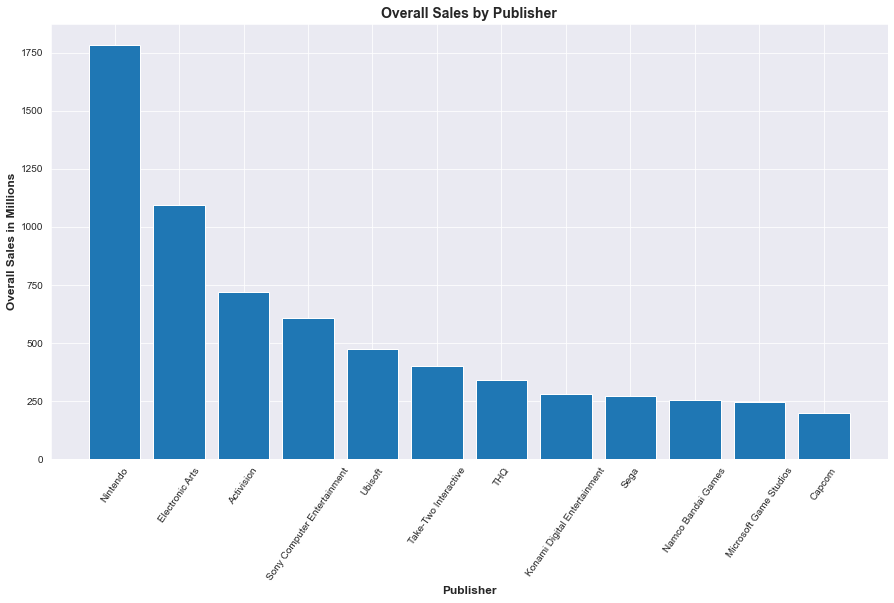

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.bar(x = dfPubSales[:12]["Publisher"], height = dfPubSales[:12]["Global_Sales"])
plt.title("Overall Sales by Publisher", fontsize = 14, fontweight = "bold")
plt.xlabel("Publisher", fontsize = 12, fontweight = "bold")
plt.ylabel("Overall Sales in Millions", fontsize = 12, fontweight = "bold")
plt.xticks(rotation = 55)
plt.show()

#### Nintendo has an overwhelming lead in overall sales, despite being 7th in terms of number of releases. Electronic Arts comes 2nd, but with a large gap between Nintendo and itself. All other publishers are considerably far from the sales that Nintendo and Electronic Arts have.

# 12. What Are The Total Sales Of Each Region?

In [62]:
dfRegionSales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
dfRegionSales = dfRegionSales.sum().reset_index()
dfRegionSales

,index,0
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


In [64]:
dfRegionSales = dfRegionSales.rename(columns = {"index": "Region", 0: "Total Sales"})
dfRegionSales

,Region,Total Sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


In [66]:
dfRegionSales.sum()

Region         NA_SalesEU_SalesJP_SalesOther_Sales
Total Sales                                8807.52
dtype: object

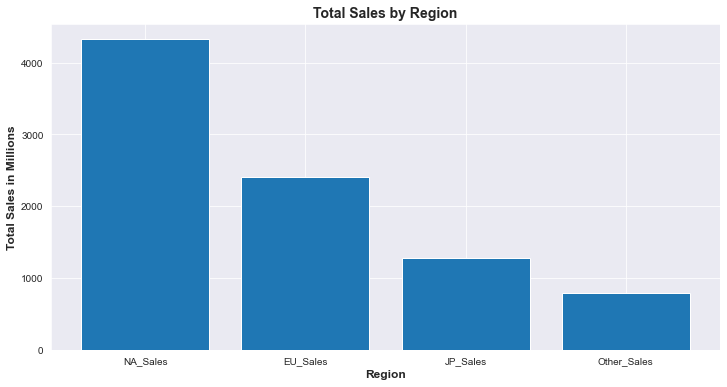

In [67]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
plt.bar(x = dfRegionSales["Region"], height = dfRegionSales["Total Sales"])
plt.title("Total Sales by Region", fontsize = 14, fontweight = "bold")
plt.xlabel("Region", fontsize = 12, fontweight = "bold")
plt.ylabel("Total Sales in Millions", fontsize = 12, fontweight = "bold")
plt.show()

#### The calculated sum of all regions' sales comes out to 8807.52 million. This means that North America accounts for nearly half of all recorded video game sales. Europe's sales come out to be around half of North America's, despite having a substantially larger population, and Japan's sales equate to around half of Europe's. Sales from all other places make up only 788.91 million, showing that North America, Europe and Japan are responsible the vast majority of the world's video game consumption. Moreover, North America is responsible for half of that consumption, Europe for a quarter, and Japan an eighth. Since Europe has a larger population but fewer sales than North America, it is likely that North America has a higher density of video game consumers.